In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv("geoMap.csv",header=1)

search_term = df.columns[1]
print(search_term)

df.columns = ["State", "score"]
df.head()

stanley tumbler: (9/19/24, 4:58 PM - 9/20/24, 4:58 PM)


,State,score
0,Alabama,100.0
1,New Hampshire,97.0
2,Idaho,91.0
3,Kansas,88.0
4,Kentucky,87.0


In [9]:
# Us states shapefile
us_states = gpd.read_file("https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json")
us_states.head()

,id,name,density,geometry
0,01,Alabama,94.650,"POLYGON ((-87.35930 35.00118, -85.60667 34.984..."
1,02,Alaska,1.264,"MULTIPOLYGON (((-131.60202 55.11798, -131.5691..."
2,04,Arizona,57.050,"POLYGON ((-109.04250 37.00026, -109.04798 31.3..."
3,05,Arkansas,56.430,"POLYGON ((-94.47384 36.50186, -90.15254 36.496..."
4,06,California,241.700,"POLYGON ((-123.23326 42.00619, -122.37885 42.0..."


In [11]:
# Merge the DataFrame with the GeoDataFrame on the state name
merged = us_states.merge(df, left_on='name', right_on='State', how='left')
merged.head()

,id,name,density,geometry,State,score
0,01,Alabama,94.650,"POLYGON ((-87.35930 35.00118, -85.60667 34.984...",Alabama,100.0
1,02,Alaska,1.264,"MULTIPOLYGON (((-131.60202 55.11798, -131.5691...",Alaska,NaN
2,04,Arizona,57.050,"POLYGON ((-109.04250 37.00026, -109.04798 31.3...",Arizona,66.0
3,05,Arkansas,56.430,"POLYGON ((-94.47384 36.50186, -90.15254 36.496...",Arkansas,NaN
4,06,California,241.700,"POLYGON ((-123.23326 42.00619, -122.37885 42.0...",California,55.0


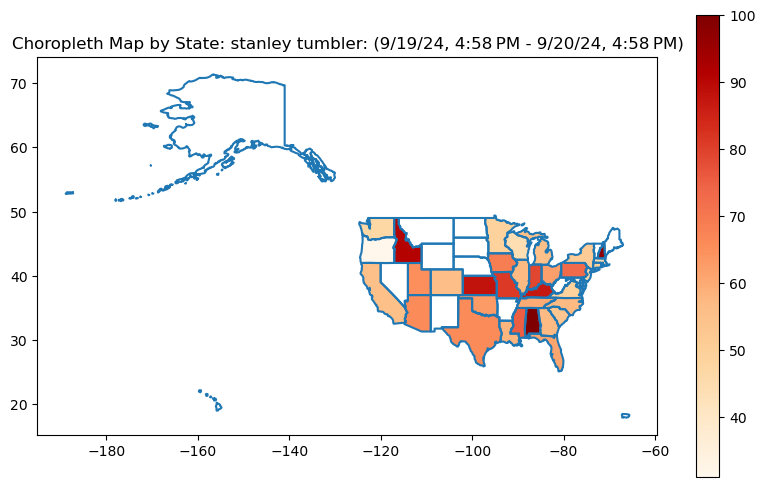

In [19]:
# Plot the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
merged.boundary.plot(ax=ax)  # Optional: add state borders
merged.plot(column="score", ax=ax, legend=True, cmap='OrRd')

# Add title and show the map
plt.title(f'Choropleth Map by State: {search_term}')
plt.show()